<a href="https://colab.research.google.com/github/SudeshnaBora/aand_numerical/blob/master/Numerical01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name** Sudeshna Bora <br>
**AssignmentNumber:** 01 <br>
**Time Taken:** : 5 hours

In [0]:
import numpy as np
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**1 (a)**<br>
Read and plotted the spike timing in the raster plot.

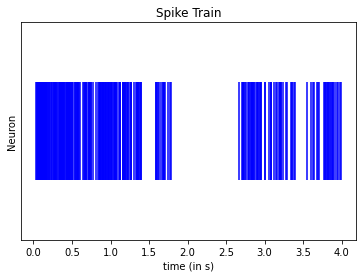

In [75]:
spike_times = np.loadtxt('ExampleSpikeTimes1.dat')
colors = 'blue'
lineoffsets = 1
linelengths = 1

plt.eventplot(spike_times*10**-3, colors=colors, lineoffsets=lineoffsets,
                    linelengths=linelengths)
plt.xlabel('time (in s)')
plt.ylabel('Neuron')
plt.title('Spike Train')
plt.yticks([])
plt.show()

**1 (b)**

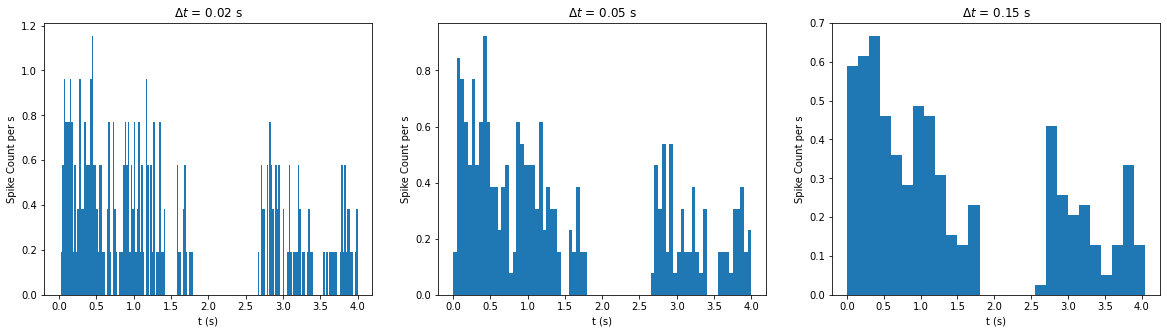

In [95]:
binSizeArray = [20*10**-3, 50*10**-3, 150*10**-3]

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for ax, binSize in zip(axes, binSizeArray):
    plt.sca(ax)
    counts, binned_spikeTime = np.histogram(spike_times*10**-3,bins=np.arange(0, 4+binSize, binSize))
    plt.hist(binned_spikeTime[:-1], binned_spikeTime,density=True,weights=counts)
    plt.xlabel('t (s)')
    plt.ylabel('Spike Count per s')
    plt.title('$\Delta t$ = {} s'.format(binSize))

**1 (c)**

In [0]:
rectange_window = lambda tau, dt: 1 / dt if tau >= -dt/2 and tau < dt/2 else 0
gaussian_window = lambda tau, sigma_w: 1 / (np.sqrt(2 * np.pi) * sigma_w) * np.exp(- tau**2 / (2 * sigma_w**2))
alpha_function = lambda tau, inverse_alpha: max(0, (1 / inverse_alpha)**2 * tau * np.exp(- 1 / inverse_alpha * tau))

I will be using $\sum\limits_{i=1}^n w(t - t_{i})$ instead of convolve.




**1 (c) i** Rectangle sliding window function

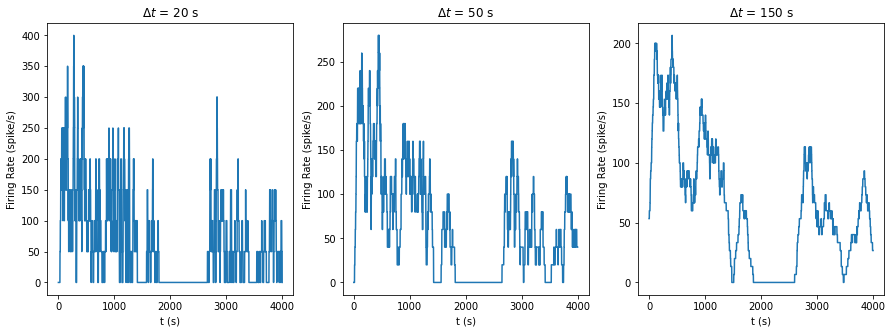

In [92]:
dts = [20, 50, 150]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i,dt in enumerate(dts):
  response = np.zeros(4001)
  for t in range(len(response)):
    for spike_time in spike_times:
      response[t] += rectange_window(t - spike_time, dt)

  plt.subplot(1,3,i+1)           
  plt.plot(response*10**3)
  plt.xlabel('t (s)')
  plt.title('$\Delta t$ = {} s'.format(dt))
  plt.ylabel("Firing Rate (spike/s)")
  
            

**1 (c) ii** Gaussian Window

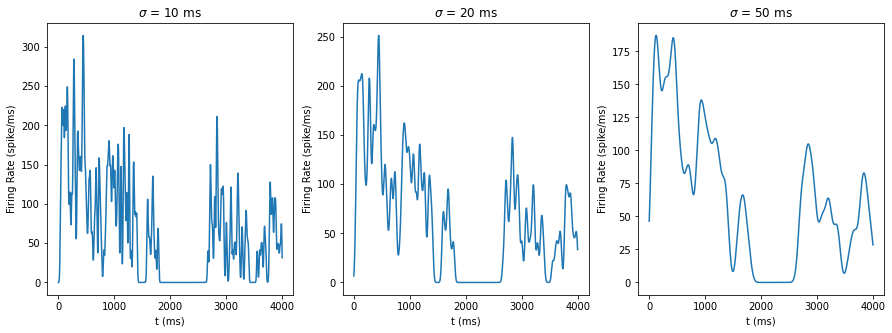

In [93]:
sigArray = [10,20,50]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i,sig in enumerate(sigArray):
  response = np.zeros(4001)
  for t in range(len(response)):
    for spike_time in spike_times:
      response[t] += gaussian_window(t - spike_time, sig)

  plt.subplot(1,3,i+1)           
  plt.plot(response*10**3)
  plt.xlabel('t (ms)')
  plt.title('$\sigma$ = {} ms'.format(sig))
  plt.ylabel("Firing Rate (spike/s)")


**1 (c) - iii** Alpha function

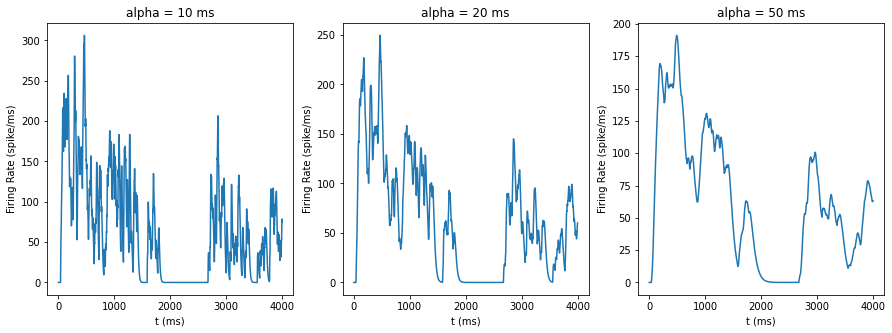

In [94]:
alphaInvArray = [10, 20, 50]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i,alph in enumerate(alphaInvArray):
  response = np.zeros(4001)
  for t in range(len(response)):
    for spike_time in spike_times:
      response[t] += alpha_function(t - spike_time, alph)

  plt.subplot(1,3,i+1)           
  plt.plot(response*10**3)
  plt.xlabel('t (ms)')
  plt.title('alpha = {} ms'.format(alph))
  plt.ylabel("Firing Rate (spike/s)")

As can be seen with $\Delta t = 150 ms, \sigma = 50 ms$ and $\alpha = 50 ms$, the firing rate for causal filtering function starts at 0 at the initial portion of the trial. <br>
We prefer  causal filtering as it is dependent on present and past input (not on filter input) which is realistically achievable.  

**1 (d) Spike Count Rate**<br>
The spike count rate = $r = n/T = 1/T\int_{0}^{T}p(t)dt$<br>
Here, n is the total no.of spikes in the trial time period

In [73]:
r = len(spike_times) / 4000
print('The spike count rate is {} spikes/s'.format(r*10**3))

The spike count rate is 65.0 spikes/s


**2 (a)**

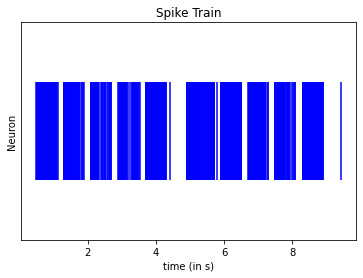

In [105]:
spike_times02 = np.loadtxt('ExampleSpikeTimes2.dat')

plt.eventplot(spike_times02*10**-3, colors=colors, lineoffsets=lineoffsets,
                    linelengths=linelengths)
plt.xlabel('time (in s)')
plt.ylabel('Neuron')
plt.title('Spike Train')
plt.yticks([])
plt.show()


Calculating firing rate with rectangle moving window

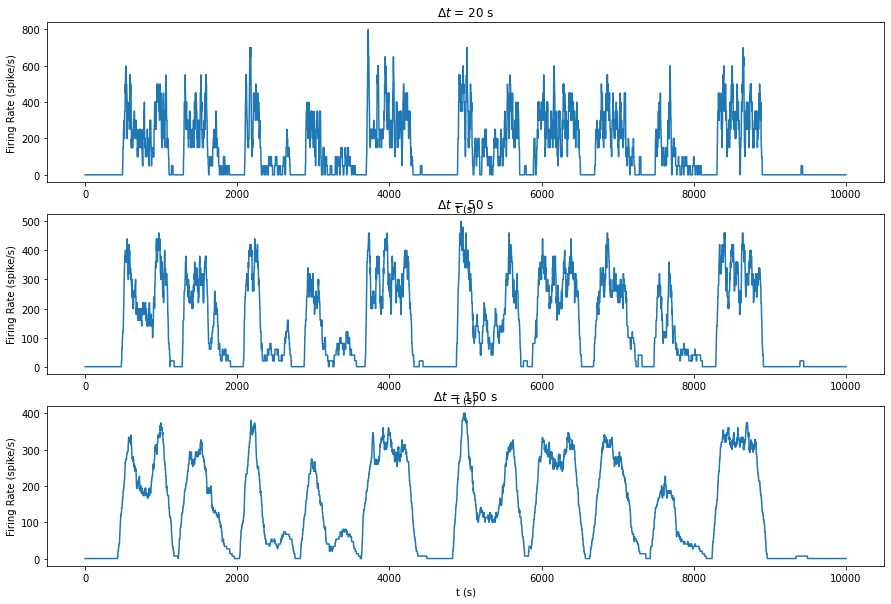

In [108]:
dts = [20, 50, 150]

fig, axes = plt.subplots(3, 1, figsize=(15, 10))

for i,dt in enumerate(dts):
  response02 = np.zeros(10001)
  for t in range(len(response02)):
    for spike_time02 in spike_times02:
      response02[t] += rectange_window(t - spike_time02, dt)

  plt.subplot(3,1,i+1)           
  plt.plot(response02*10**3)
  plt.xlabel('t (s)')
  plt.title('$\Delta t$ = {} s'.format(dt))
  plt.ylabel("Firing Rate (spike/s)")

Calculating firing rate with gaussian window

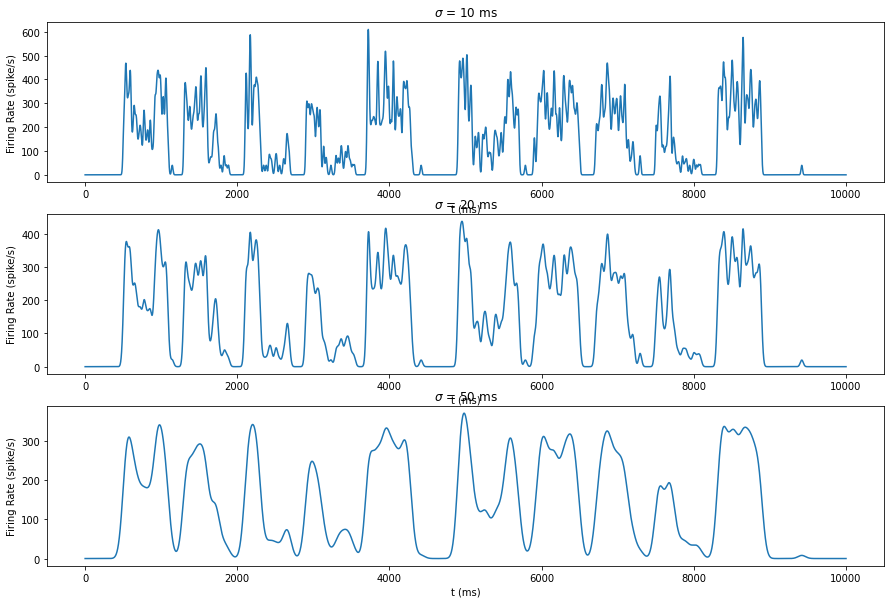

In [110]:
sigArray = [10,20,50]

fig, axes = plt.subplots(3, 1, figsize=(15, 10))

for i,sig in enumerate(sigArray):
  response02 = np.zeros(10001)
  for t in range(len(response02)):
    for spike_time02 in spike_times02:
      response02[t] += gaussian_window(t - spike_time02, sig)

  plt.subplot(3,1,i+1)           
  plt.plot(response02*10**3)
  plt.xlabel('t (ms)')
  plt.title('$\sigma$ = {} ms'.format(sig))
  plt.ylabel("Firing Rate (spike/s)")

Calculating firing rate with alpha function

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


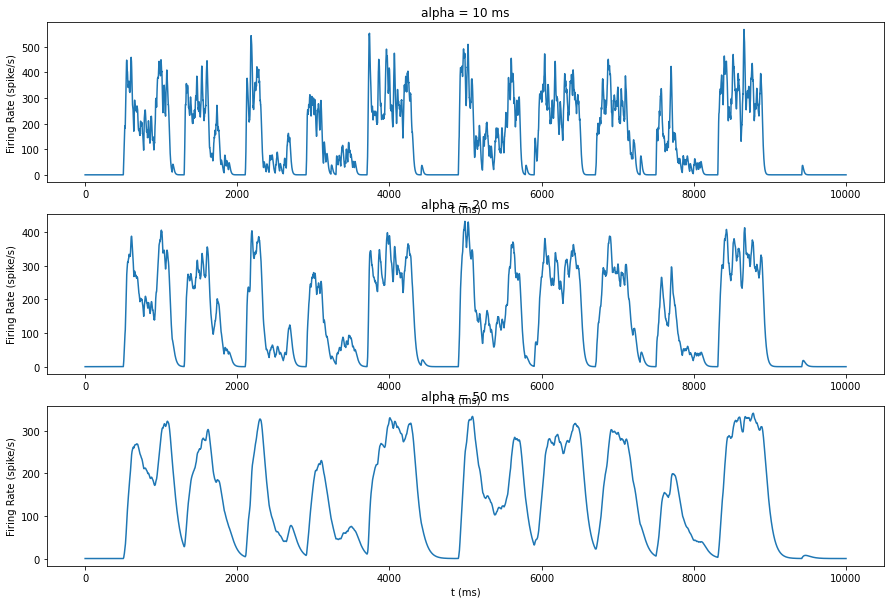

In [112]:
alphaInvArray = [10, 20, 50]

fig, axes = plt.subplots(3, 1, figsize=(15, 10))

for i,alph in enumerate(alphaInvArray):
  response02 = np.zeros(10001)
  for t in range(len(response02)):
    for spike_time02 in spike_times02:
      response02[t] += alpha_function(t - spike_time02, alph)

  plt.subplot(3,1,i+1)           
  plt.plot(response02*10**3)
  plt.xlabel('t (ms)')
  plt.title('alpha = {} ms'.format(alph))
  plt.ylabel("Firing Rate (spike/s)")